/home/tspadua/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/tspadua/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/tspadua/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/tspadua/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/tspadua/.local/lib/python3.8/s

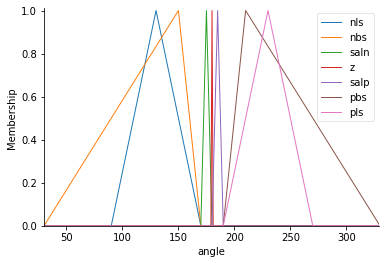

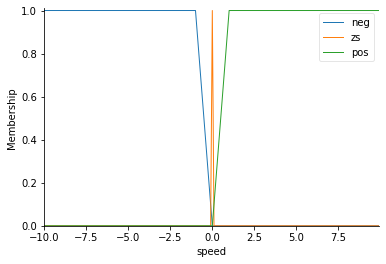

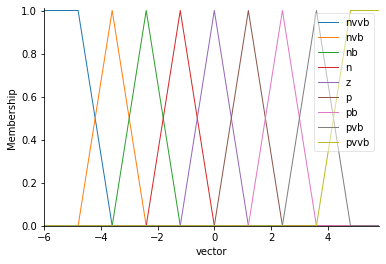

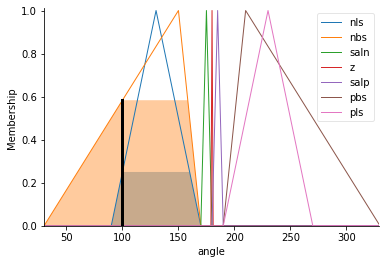

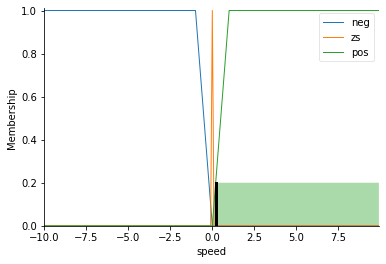

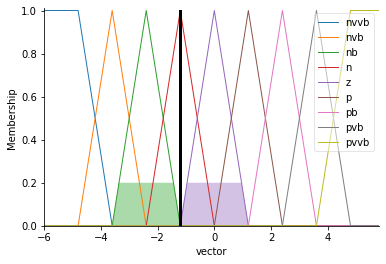


Angle 100 
Speed 0.2 
Vector -1.2


In [11]:
#imports
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Variaveis de Entrada (Antecedent)
angulo = ctrl.Antecedent(np.arange(30, 330, 1), 'angle')
velocidade = ctrl.Antecedent(np.arange(-10, 10, 0.1), 'speed')

#Variaveis de saída (Consequent)
vector = ctrl.Consequent(np.arange(-6, 6, 0.2), 'vector')


# atribuicao sem o automf
angulo['nls'] = fuzz.trimf(angulo.universe, [90, 130, 170])
angulo['nbs'] = fuzz.trimf(angulo.universe, [30, 150, 170])
angulo['saln'] = fuzz.trimf(angulo.universe, [170, 175, 180])
angulo['z'] = fuzz.trimf(angulo.universe, [180, 180, 180])
angulo['salp'] = fuzz.trimf(angulo.universe, [180, 185, 190])
angulo['pbs'] = fuzz.trimf(angulo.universe, [190, 210, 330])
angulo['pls'] = fuzz.trimf(angulo.universe, [190, 230, 270])

velocidade['neg'] = fuzz.trapmf(velocidade.universe, [-10, -10, -1, 0])
velocidade['zs'] = fuzz.trapmf(velocidade.universe, [-0.1, 0, 0, 0.1])
velocidade['pos'] = fuzz.trapmf(velocidade.universe, [0, 1, 10, 10])

vector['nvvb'] = fuzz.trapmf(vector.universe, [-6, -6, -4.8, -3.6])
vector['nvb'] = fuzz.trimf(vector.universe, [-4.8, -3.6, -2.4])
vector['nb'] = fuzz.trimf(vector.universe, [-3.6, -2.4, -1.2])
vector['n'] = fuzz.trimf(vector.universe, [-2.4, -1.2, 0])
vector['z'] = fuzz.trimf(vector.universe, [-1.2, 0, 1.2])
vector['p'] = fuzz.trimf(vector.universe, [0, 1.2, 2.4])
vector['pb'] = fuzz.trimf(vector.universe, [1.2, 2.4, 3.6])
vector['pvb'] = fuzz.trimf(vector.universe, [2.4, 3.6, 4.8])
vector['pvvb'] = fuzz.trapmf(vector.universe, [3.6, 4.8, 6, 6])


angulo.view()
velocidade.view()
vector.view()

#Criando as regras
rules = []
rules.append(ctrl.Rule(angulo['nls'] & velocidade['pos'], vector['nb']))
rules.append(ctrl.Rule(angulo['nbs'] & velocidade['pos'], vector['z']))
rules.append(ctrl.Rule(angulo['saln'] & velocidade['pos'], vector['n']))
rules.append(ctrl.Rule(angulo['z'] & velocidade['zs'], vector['p']))
rules.append(ctrl.Rule(angulo['salp'] & velocidade['neg'], vector['p']))
rules.append(ctrl.Rule(angulo['pbs'] & velocidade['neg'], vector['z']))
rules.append(ctrl.Rule(angulo['pls'] & velocidade['neg'], vector['pb']))

controlador = ctrl.ControlSystem(rules)

#Simulando
vector_calc = ctrl.ControlSystemSimulation(controlador)

angulo_entrada = float(input('Angulo de entrada: '))
velocidade_entrada = float(input('Velocidade: '))

vector_calc.input['angle'] = angulo_entrada
vector_calc.input['speed'] = velocidade_entrada
vector_calc.compute()

vector_output = vector_calc.output['vector']

angulo.view(sim=vector_calc)
velocidade.view(sim=vector_calc)
vector.view(sim=vector_calc)

plt.show()


print("\nAngle %d \nSpeed %.1f \nVector %.1f" %(
        angulo_entrada,
        velocidade_entrada,
        vector_output))